# CA 2 - Dropout

---

1) **What happens if you change the dropout probabilities for the first and second layers? In particular,
what happens if you switch the ones for both layers?** Design an experiment to answer these
questions, describe your results quantitatively, and summarize the qualitative takeaways.

# Experiment

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/dracula/matplotlib/master/dracula.mplstyle')

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [4]:
# Split data
x_val, y_val = x_train[-12000:], y_train[-12000:]
x_train, y_train = x_train[:-12000], y_train[:-12000]

In [5]:
def create_model(dropout1, dropout2):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout1),
        Dense(64, activation='relu'),
        Dropout(dropout2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


#### Models

In [6]:
# Configuration A: First layer dropout = 0.2, Second layer dropout = 0.5
model_a = create_model(0.2, 0.5)
history_a = model_a.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), verbose=2)

# Configuration B: First layer dropout = 0.5, Second layer dropout = 0.2
model_b = create_model(0.5, 0.2)
history_b = model_b.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), verbose=2)

e:\College\.conda\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
750/750 - 3s - 4ms/step - accuracy: 0.8350 - loss: 0.5384 - val_accuracy: 0.9467 - val_loss: 0.1877
Epoch 2/50
750/750 - 1s - 2ms/step - accuracy: 0.9295 - loss: 0.2506 - val_accuracy: 0.9588 - val_loss: 0.1397
Epoch 3/50
750/750 - 1s - 2ms/step - accuracy: 0.9461 - loss: 0.1940 - val_accuracy: 0.9657 - val_loss: 0.1145
Epoch 4/50
750/750 - 1s - 2ms/step - accuracy: 0.9546 - loss: 0.1593 - val_accuracy: 0.9691 - val_loss: 0.1063
Epoch 5/50
750/750 - 1s - 2ms/step - accuracy: 0.9623 - loss: 0.1376 - val_accuracy: 0.9707 - val_loss: 0.1005
Epoch 6/50
750/750 - 1s - 2ms/step - accuracy: 0.9643 - loss: 0.1237 - val_accuracy: 0.9719 - val_loss: 0.0976
Epoch 7/50
750/750 - 1s - 2ms/step - accuracy: 0.9672 - loss: 0.1132 - val_accuracy: 0.9734 - val_loss: 0.0947
Epoch 8/50
750/750 - 1s - 2ms/step - accuracy: 0.9700 - loss: 0.1082 - val_accuracy: 0.9746 - val_loss: 0.0939
Epoch 9/50
750/750 - 1s - 2ms/step - accuracy: 0.9714 - loss: 0.0972 - val_accuracy: 0.9746 - val_loss: 0.0938
E

In [7]:
test_loss_a, test_acc_a = model_a.evaluate(x_test, y_test, verbose=2)
test_loss_b, test_acc_b = model_b.evaluate(x_test, y_test, verbose=2)

print(f'Configuration A - Test Accuracy: {test_acc_a:.4f}')
print(f'Configuration B - Test Accuracy: {test_acc_b:.4f}')

313/313 - 0s - 921us/step - accuracy: 0.9789 - loss: 0.1244
313/313 - 0s - 900us/step - accuracy: 0.9754 - loss: 0.0940
Configuration A - Test Accuracy: 0.9789
Configuration B - Test Accuracy: 0.9754


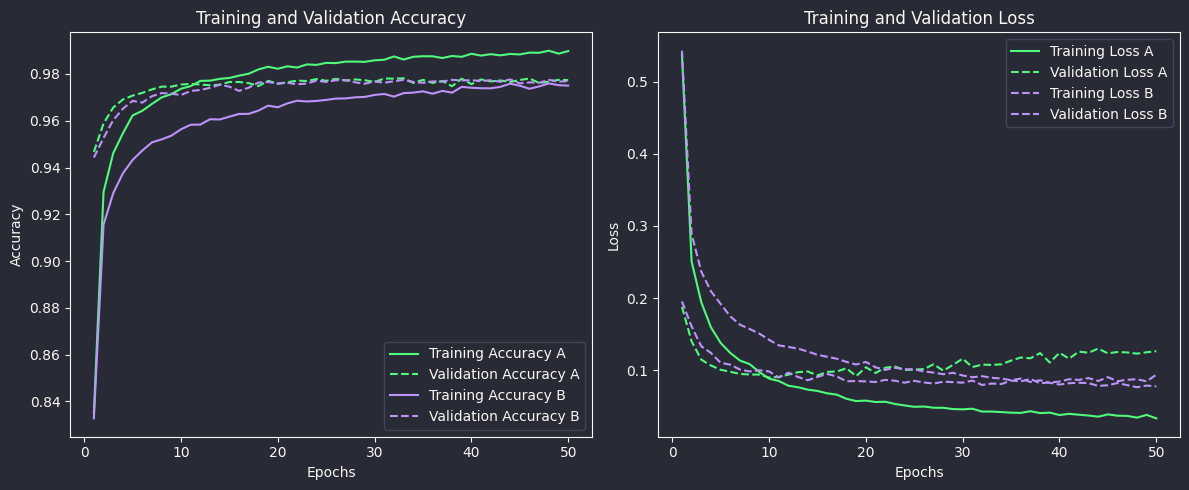

In [8]:
def plot_history(history_a, history_b):
    epochs = range(1, 51)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_a.history['accuracy'], color='#50fa7b',label='Training Accuracy A',)
    plt.plot(epochs, history_a.history['val_accuracy'], color='#50fa7b', linestyle='--', label='Validation Accuracy A')
    plt.plot(epochs, history_b.history['accuracy'],color='#bd93f9', label='Training Accuracy B')
    plt.plot(epochs, history_b.history['val_accuracy'], color='#bd93f9', linestyle='--' ,label='Validation Accuracy B')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_a.history['loss'],  color='#50fa7b', linestyle='-', label='Training Loss A')
    plt.plot(epochs, history_a.history['val_loss'], color='#50fa7b', linestyle='--', label='Validation Loss A')
    plt.plot(epochs, history_b.history['loss'], color='#bd93f9', linestyle='--' , label='Training Loss B')
    plt.plot(epochs, history_b.history['val_loss'], color='#bd93f9', linestyle='--' , label='Validation Loss B')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_a, history_b)

# Reasoning

In the [Experiment](#experiment), Configuration A, the higher dropout rate is applied to the second layer, which may help in preventing overfitting by providing more regularization to the deeper layers of the network. Configuration B, on the other hand, applies a higher dropout rate to the first layer, possibly helping to prevent overfitting at an earlier stage of the network's processing.

By comparing the performance of these configurations, we can gain insights into the impact of dropout rates on the model's ability to generalize to unseen data.

---

#### 2) Why is dropout **not** typically used at test time?

Let's break down dropout in neural networks for training and testing in a simpler way.

Imagine training a team to complete a complex task. Dropout is like randomly taking some team members out of practice each time. This forces everyone to learn to be flexible and contribute on their own, instead of relying on the same teammates all the time. This helps prevent the team from becoming overly dependent on specific people (overfitting).

However, when it's time for the real test, we want the entire team to work together at full strength. Using dropout during testing would be like randomly removing people right before the performance, leading to unpredictable results.

Therefore, dropout is a training technique to make the team adaptable, but for the final test, we use everything the team learned, including the benefits of dropout, to get the best outcome.


~~~

---